In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ds=xr.open_dataset('/g/data/eg3/jxb548/OBSDATA/rr_monthly_0.25.1900-2015.nc')
rr=ds.rr
land_sea_ds = xr.open_dataset('/g/data/eg3/pfd548/gridarea/land-sea_mask/fractional_land.1.5-deg.nc')
nw_area=rr.sel(lat=slice(-26,-10),lon=slice(112,138))
ne_area=rr.sel(lat=slice(-26,-10),lon=slice(138,156))
nw_land=nw_area.where(landfrac>0)
ne_land=ne_area.where(landfrac>0)
nw_climate=nw_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
ne_climate=ne_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
nw_anomaly=(nw_land.groupby('time.month')-nw_climate).mean(dim=['lon','lat'])
ne_anomaly=(ne_land.groupby('time.month')-ne_climate).mean(dim=['lon','lat'])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-1-1 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:572: SerializationWarning: Unable to decode time axis into 

NameError: name 'landfrac' is not defined

In [2]:
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xr.open_dataset(url).sftlf

In [3]:
nw_land=nw_area.where(landfrac>0)
ne_land=ne_area.where(landfrac>0)
nw_climate=nw_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
ne_climate=ne_land.sel(time=slice('1950','1979')).groupby('time.month').mean()
nw_anomaly=(nw_land.groupby('time.month')-nw_climate).mean(dim=['lon','lat'])
ne_anomaly=(ne_land.groupby('time.month')-ne_climate).mean(dim=['lon','lat'])

In [4]:
nw_anomaly

<xarray.DataArray 'rr' (time: 1392)>
array([-2.3136253 , -2.5076315 ,  1.2648083 , ..., -0.24307512,
        0.0867044 ,  2.8002036 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

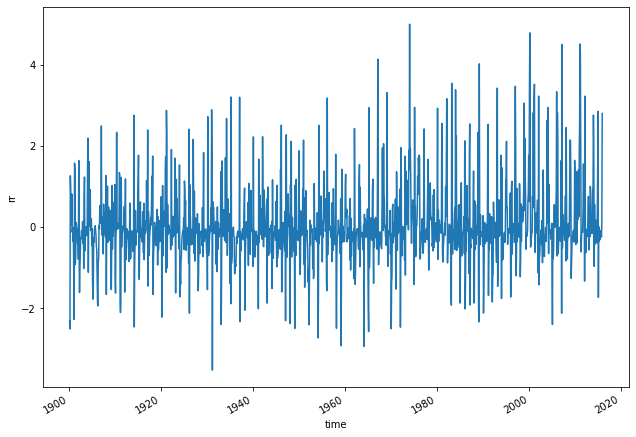

In [5]:
nw_anomaly.plot(size=7)

In [6]:
nw_anomaly.groupby('time.season')

DataArrayGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [7]:
nw_anomaly.groupby('time.season')['DJF']

<xarray.DataArray 'rr' (time: 348)>
array([-2.3136253 , -2.5076315 , -1.11602   , -2.274452  ,  1.578131  ,
       -0.79283684,  1.6432282 , -0.66176873, -0.40549546,  0.15347064,
       -1.0196369 ,  1.4305947 ,  2.1962233 , -1.1124897 , -0.0354677 ,
       -1.3175049 , -1.7744741 , -0.5570561 , -1.3298851 , -1.8453709 ,
        2.4943793 , -0.12381022, -0.19681063,  1.271092  , -1.6572074 ,
        0.09409782,  0.41223398, -1.4171983 , -1.536716  , -1.1863539 ,
       -1.6246057 , -0.23782973,  1.2860682 , -1.9245955 , -2.10447   ,
        0.51233584, -1.6005545 ,  0.27917427, -0.8448478 , -0.5486387 ,
        0.19070224, -0.53512645,  2.7571883 , -2.458205  ,  1.1087077 ,
        1.7722694 , -1.2158785 ,  0.38187322,  0.18102388, -0.63090056,
        0.15781698,  2.393224  , -1.4527293 ,  1.2554077 ,  0.15429462,
        1.7535118 , -0.16442719,  0.10010794,  0.43954447,  0.74947524,
        0.3970763 , -2.216597  ,  1.7354522 , -1.111782  ,  2.8764038 ,
       -0.12342565, -0.554715  , -0.09359305,  1.7008533 ,  0.10436822,
       -1.6200131 ,  1.5333668 , -1.7160103 , -1.0878634 , -0.54800034,
        1.1370605 ,  0.9346544 , -0.87966585,  2.415416  , -2.1180654 ,
        2.1656613 ,  0.84091604, -0.64622927, -0.5965984 , -1.5674971 ,
       -1.1171705 ,  0.4826492 , -0.72495615,  0.48260665, -0.3779398 ,
       -1.5378001 ,  2.7231243 ,  2.8911438 ,  1.6930711 , -3.5218246 ,
       -0.9158767 ,  0.0881735 , -1.0955067 ,  1.3698184 , -2.4004316 ,
...
       -1.9214208 , -0.5521062 ,  3.3868918 ,  0.21919866,  0.5529629 ,
       -1.869839  , -0.28154525, -0.6524184 ,  2.1260467 , -2.0151024 ,
       -1.1428059 ,  1.7436721 ,  2.5449908 ,  1.3834519 , -1.8619174 ,
       -1.8667653 ,  2.341586  , -1.9942756 , -2.333565  , -0.46205005,
        0.28148562, -2.1155486 , -0.11054742,  1.9128826 ,  2.5349844 ,
       -1.3043771 , -1.8430753 , -1.2182543 , -0.8641134 ,  0.91838896,
        3.4267755 ,  1.7714237 , -1.7569689 ,  1.4657147 ,  1.1084695 ,
        1.2317727 ,  2.1125972 ,  0.84141195, -1.7211787 , -1.2985736 ,
        1.9848528 ,  3.4712641 ,  2.0478735 ,  1.0721439 ,  0.57390463,
       -1.2215289 ,  3.0575085 ,  0.40571856,  2.18601   ,  1.771654  ,
        0.6313206 ,  3.459168  ,  2.8186822 ,  0.78091514,  3.1787927 ,
        0.48181993, -1.1305994 ,  3.2302196 , -0.87562084,  0.822339  ,
        1.4089438 ,  2.6284091 ,  0.10315777,  2.9493403 ,  0.09475806,
       -0.99468774, -2.3978455 ,  0.92518395,  3.335459  , -0.7113237 ,
       -0.05668637,  1.6434262 , -2.1230602 ,  0.77383757, -0.834015  ,
        2.4553688 ,  2.1490364 ,  2.1222234 ,  1.3130594 ,  1.6463586 ,
        1.2311589 , -0.34759387,  1.8027852 ,  2.627786  ,  4.51392   ,
        0.8055257 ,  1.4552082 , -1.3283482 ,  0.7607405 , -0.56253815,
        0.19377938,  0.9770183 ,  2.760129  ,  1.9536517 ,  1.214732  ,
        2.8535304 , -1.7311498 ,  2.8002036 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-16T12:00:00 ... 2015-12-16T12:00:00
    month    (time) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2 12

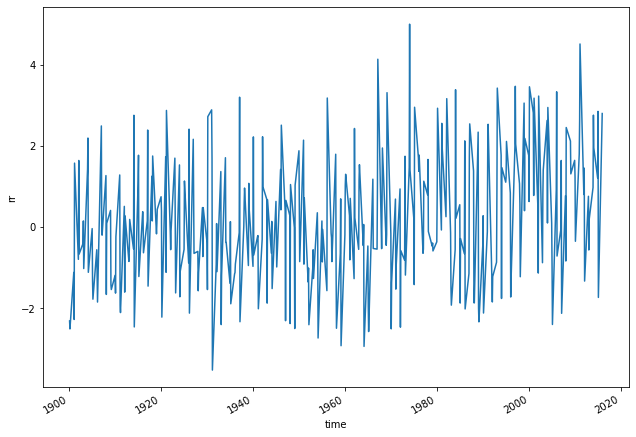

In [8]:
nw_anomaly.groupby('time.season')['DJF'].plot(size=7)

In [9]:
nw_DJF=nw_anomaly.groupby('time.season')['DJF']

In [10]:
ne_DJF=ne_anomaly.groupby('time.season')['DJF']

In [11]:
nw_DJF.group('time.month')

AttributeError: 'DataArray' object has no attribute 'group'

In [12]:
nw_DJF.groupby('time.month')

DataArrayGroupBy, grouped over 'month'
3 groups with labels 1, 2, 12.

In [13]:
nw_DJF.groupby('time.month').mean(dim='month')

ValueError: cannot reduce over dimensions ['month']. expected either '...' to reduce over all dimensions or one or more of ('time',).

In [14]:
nw_DJF.mean(dim='time.month')

ValueError: 'time.month' not found in array dimensions ('time',)

In [15]:
nw_DJF.groupby('time.month').mean()

<xarray.DataArray 'rr' (month: 3)>
array([0.14522286, 0.01643197, 0.38746315], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 12

In [16]:
nw_DJF[0]

<xarray.DataArray 'rr' ()>
array(-2.3136253, dtype=float32)
Coordinates:
    time     datetime64[ns] 1900-01-16T12:00:00
    month    int64 1

In [17]:
nw_DJF[1]

<xarray.DataArray 'rr' ()>
array(-2.5076315, dtype=float32)
Coordinates:
    time     datetime64[ns] 1900-02-15
    month    int64 2

In [18]:
nw_DJF[2]

<xarray.DataArray 'rr' ()>
array(-1.11602, dtype=float32)
Coordinates:
    time     datetime64[ns] 1900-12-16T12:00:00
    month    int64 12

In [19]:
nw_DJF(0)

TypeError: 'DataArray' object is not callable

In [20]:
nw_DJF.mean('December','January','February')

ValueError: cannot supply both 'axis' and 'dim' arguments

In [21]:
nw.DJF.resample(time='AS-DEC').mean()

NameError: name 'nw' is not defined

In [22]:
nw_DJF.resample(time='AS-DEC').mean()

<xarray.DataArray 'rr' (time: 117)>
array([-2.4106283 , -0.60411364,  0.0628742 , -0.42388725,  0.83810943,
       -1.0424823 , -1.244104  ,  0.72458607, -0.09733916, -0.8472268 ,
       -1.0162631 , -0.9143324 , -0.26968148, -0.4009281 , -0.07871437,
        0.5550329 , -0.02266783,  0.36610386,  1.0544047 ,  0.12507507,
       -0.35668182,  1.1666913 , -0.25724456,  0.06173615, -0.42350233,
        0.5079048 , -0.19410507,  0.78678274, -1.0937552 ,  0.0800999 ,
        0.2691281 ,  0.35413018, -0.64106995, -0.740427  ,  0.32068178,
       -1.045404  , -1.0587416 ,  0.2452975 ,  0.53075093,  0.19764352,
        0.19103535, -0.8151231 ,  0.974773  , -0.16972204, -0.6711262 ,
       -0.21835959,  1.4540182 , -0.41591462, -0.34364188, -0.4904252 ,
        0.47298384,  0.65066737, -1.5875359 , -0.9475727 , -0.90484315,
       -0.25383762,  0.07551893, -0.41784036, -0.57417995, -0.9594564 ,
        0.71566933,  0.06333604,  0.46482924,  0.7163643 , -1.1085616 ,
       -1.6595712 ,  0.5188847 ,  1.5379071 ,  0.6481766 ,  0.89636534,
       -1.3447529 , -0.59375614, -0.7002606 , -0.08254451,  2.630129  ,
        0.58345056,  1.6199538 , -0.0170633 ,  0.7868266 , -0.48141512,
        1.1377124 ,  1.4893414 ,  1.744668  , -1.182355  ,  1.0179948 ,
       -0.5328071 , -0.18049137,  1.0486189 , -0.7817435 , -0.6620848 ,
       -0.765371  ,  1.4457731 , -1.4552355 ,  1.1603503 ,  0.49338984,
        1.4842798 , -0.7261135 ,  2.5013301 ,  0.14150655,  1.8830789 ,
        1.9540476 ,  2.2594633 ,  0.86048007,  0.45188728,  1.8936357 ,
       -1.0992584 ,  1.1831064 , -0.17877348,  0.79839706,  1.8614397 ,
        0.8433079 ,  2.9814968 ,  0.31079522,  0.13066058,  1.896933  ,
        0.77903765,  2.8002036 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2015-12-01

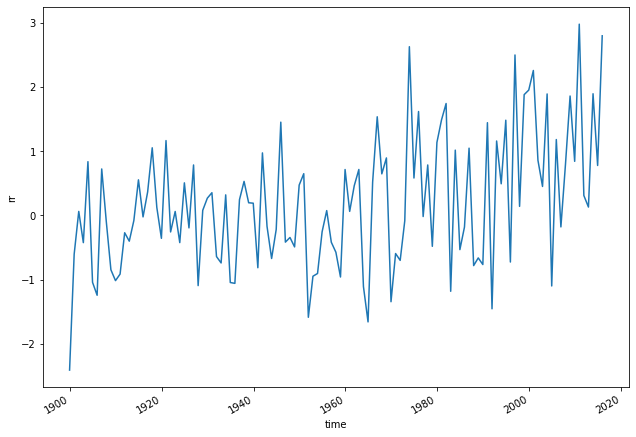

In [23]:
nw_DJF.resample(time='AS-DEC').mean().plot(size=7)

In [24]:
ne_DJF.resample(time='AS-DEC').mean()

<xarray.DataArray 'rr' (time: 117)>
array([-2.5608714 , -1.1204972 , -3.2176273 , -1.7974163 , -0.21904759,
       -1.6000814 , -0.82506007, -0.14285368,  0.7975839 , -2.0463083 ,
        1.0016216 ,  1.7601079 , -2.4838603 ,  0.20171328, -0.01700811,
       -2.3144743 , -0.3464749 ,  1.329615  ,  2.0520754 , -1.1706494 ,
       -1.0970784 , -0.32226667,  0.5253468 , -1.6714998 , -1.0742146 ,
        0.15932898, -2.6536229 ,  0.59074104, -0.5780104 ,  0.13233563,
        0.6970379 , -2.3905182 , -1.7422224 , -0.16475527,  0.5661781 ,
       -2.7334669 , -0.8256161 , -1.0542394 , -0.37066033,  0.17593662,
        0.92877275, -0.41035345, -1.4303671 ,  0.33997336, -0.13987803,
       -0.5370738 ,  0.30938432, -0.82079035, -1.6340593 , -0.7118926 ,
        0.45983252,  1.6674341 , -1.8981047 ,  1.0478452 ,  0.7450228 ,
        0.745694  , -0.11963781,  0.7480326 , -1.1524588 , -0.9137995 ,
       -0.37184045, -1.7036492 ,  0.11686835, -0.03874277, -1.1607019 ,
       -1.8083205 , -0.59816486, -1.0025002 ,  0.77330846, -1.8861752 ,
       -0.837997  , -0.40772358,  0.6391721 , -0.7203727 ,  4.597909  ,
       -0.3066626 ,  2.3333213 ,  1.4589801 , -1.3487153 ,  1.322585  ,
       -1.1103282 ,  2.077422  , -1.886356  , -3.4694755 ,  0.29039305,
       -1.8246919 , -1.8110467 , -1.1766373 , -2.4229841 , -1.0892967 ,
       -3.4440708 ,  2.9604962 , -1.6628337 ,  0.32009032, -1.0764112 ,
       -1.0871426 , -1.395979  , -0.25373307,  0.21681254,  0.25839922,
        0.28548446,  0.8571195 , -1.0700777 , -1.1304501 ,  0.13914323,
       -1.4059733 , -1.6809047 , -0.31373462,  0.75326794,  2.5356054 ,
        0.81707805,  1.7075249 , -0.21395211, -1.7845432 , -0.42204165,
       -1.5408134 ,  1.3107754 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2015-12-01

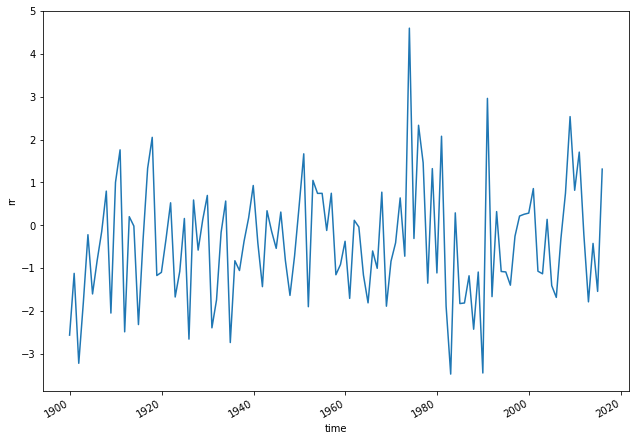

In [25]:
ne_DJF.resample(time='AS-DEC').mean().plot(size=7)

In [26]:
ds2=xr.open_dataset('/home/563/lx7831/ncfile/sst.mnmean.nc')
sst=ds2.sst
nino3_area=sst.sel(lat=slice(5,-5),lon=slice(210,270))
nino34_area=sst.sel(lat=slice(5,-5),lon=slice(190,240))
nino4_area=sst.sel(lat=slice(5,-5),lon=slice(160,210))
nino3_climate=nino3_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino34_climate=nino34_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino4_climate=nino4_area.sel(time=slice('1950','1979')).groupby('time.month').mean()
nino3_anomaly=(nino3_area.groupby('time.month')-nino3_climate).mean(dim='lat').mean(dim='lon')
nino34_anomaly=(nino34_area.groupby('time.month')-nino34_climate).mean(dim='lat').mean(dim='lon')
nino4_anomaly=(nino4_area.groupby('time.month')-nino4_climate).mean(dim='lat').mean(dim='lon')
alpha=xr.where(nino3_anomaly*nino4_anomaly>0,0.4,0)
nct=nino3_anomaly-alpha*nino4_anomaly
nwp=nino4_anomaly-alpha*nino3_anomaly
nino3_rolling=nino3_anomaly.rolling(time=5).mean()
nino34_rolling=nino34_anomaly.rolling(time=5).mean()
nino4_rolling=nino4_anomaly.rolling(time=5).mean()
nct_rolling=nct.rolling(time=5).mean()
nwp_rolling=nwp.rolling(time=5).mean()
nino3_modern=nino3_rolling.sel(time=slice('1900','2015'))
nino34_modern=nino34_rolling.sel(time=slice('1900','2015'))
nino4_modern=nino4_rolling.sel(time=slice('1900','2015'))
nct_modern=nct_rolling.sel(time=slice('1900','2015'))
nwp_modern=nwp_rolling.sel(time=slice('1900','2015'))

In [27]:
nino3_DJF=nino3_modern.groupby('time.season')['DJF']
nino34_DJF=nino34_modern.groupby('time.season')['DJF']
nino4_DJF=nino4_modern.groupby('time.season')['DJF']
nct_DJF=nct_modern.groupby('time.season')['DJF']
nwp_DJF=nwp_modern.groupby('time.season')['DJF']

In [28]:
nino3_DJF

<xarray.DataArray 'sst' (time: 348)>
array([ 1.64232862e+00,  1.66829455e+00,  1.48306653e-01,  1.75489396e-01,
        2.21114621e-01,  3.47310789e-02,  2.01670647e-01,  2.54831403e-01,
        1.76403618e+00,  1.75722468e+00,  1.64901769e+00, -1.15702569e+00,
       -1.18047583e+00, -1.15416837e+00,  7.56153584e-01,  8.18802297e-01,
        8.41621339e-01,  1.28135443e+00,  1.21680450e+00,  1.02177846e+00,
       -8.91168892e-01, -8.30481827e-01, -8.24430287e-01, -7.36858770e-02,
       -1.59064487e-01, -2.25375369e-01, -9.35200810e-01, -1.06741941e+00,
       -1.12485385e+00, -1.35671723e+00, -1.45701301e+00, -1.43491638e+00,
       -7.96643317e-01, -8.11067522e-01, -8.58861744e-01,  1.20650542e+00,
        1.35051954e+00,  1.46282995e+00, -2.90264577e-01, -3.13343495e-01,
       -2.92571783e-01,  6.16747975e-01,  7.77809262e-01,  8.43326211e-01,
        1.24804246e+00,  1.34657574e+00,  1.23426759e+00, -6.48523927e-01,
       -6.02612495e-01, -5.34835339e-01, -1.65570831e+00, -1.76273978e+00,
       -1.83791161e+00, -1.00276375e+00, -1.13357174e+00, -1.06565905e+00,
        1.59935629e+00,  1.70398140e+00,  1.72530401e+00,  6.35448873e-01,
        9.37724411e-01,  1.02300012e+00, -2.78894246e-01, -3.17424983e-01,
       -4.50151116e-01,  9.62987125e-01,  1.04435992e+00,  7.90485084e-01,
       -1.05219829e+00, -8.90823543e-01, -7.31679440e-01,  6.53849423e-01,
        6.21925771e-01,  5.16590774e-01, -1.27759123e+00, -1.27207267e+00,
       -1.28101265e+00,  8.80691350e-01,  1.06427062e+00,  1.15563023e+00,
...
        4.15464252e-01,  4.04896587e-01,  3.64152014e-01,  1.19289815e+00,
        1.34873164e+00,  1.50985777e+00,  1.94881469e-01,  1.77749112e-01,
        2.51549035e-01,  6.09565198e-01,  5.84309042e-01,  4.85173464e-01,
        8.43848705e-01,  1.03649807e+00,  1.11796641e+00, -5.33481061e-01,
       -5.30273259e-01, -4.79223460e-01, -1.84844017e-01, -2.88686991e-01,
       -3.39730740e-01,  3.46291518e+00,  3.54600763e+00,  3.45555496e+00,
       -4.51082766e-01, -5.84409118e-01, -5.93663871e-01, -8.16747308e-01,
       -9.93650377e-01, -1.01756942e+00, -7.93152675e-02, -8.22179839e-02,
       -9.58510861e-02, -5.26804700e-02, -1.18767940e-01, -6.54468164e-02,
        1.43125534e+00,  1.42907095e+00,  1.32687604e+00,  8.96423042e-01,
        9.14216042e-01,  9.24832165e-01,  9.64787424e-01,  9.69309747e-01,
        8.41501236e-01, -6.70474321e-02, -2.76268214e-01, -3.46767992e-01,
        1.30405426e+00,  1.38485503e+00,  1.21740651e+00, -9.69440639e-01,
       -1.03908408e+00, -1.05106986e+00,  4.93823767e-01,  2.78567731e-01,
        8.53670388e-02,  1.40909600e+00,  1.45025015e+00,  1.45071077e+00,
       -9.30682838e-01, -9.65517223e-01, -8.78611982e-01, -3.65362018e-01,
       -4.13487166e-01, -3.47497553e-01,  5.35460174e-01,  2.88828194e-01,
        9.13190171e-02,  1.50696263e-01,  1.83032051e-01,  7.58879781e-02,
        9.76117551e-01,  9.95131493e-01,  9.14855599e-01,  3.02410245e+00],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2 12

In [29]:
nct_DJF

<xarray.DataArray 'sst' (time: 348)>
array([ 1.34294040e+00,  1.34097550e+00, -1.24870517e-01, -1.05829201e-01,
       -3.36550832e-02,  5.19690812e-02,  2.08198764e-01,  2.54476816e-01,
        1.35109750e+00,  1.28684541e+00,  1.14572425e+00, -8.98057153e-01,
       -8.83028276e-01, -7.96570933e-01,  6.56299407e-01,  6.91957550e-01,
        7.00893872e-01,  9.60431061e-01,  9.24398403e-01,  8.07861283e-01,
       -7.21135756e-01, -6.72978641e-01, -6.40951849e-01, -9.86404054e-02,
       -1.59064262e-01, -2.25375156e-01, -6.07084677e-01, -7.08968050e-01,
       -7.47953432e-01, -1.00863075e+00, -1.05151954e+00, -9.71253033e-01,
       -3.73315930e-01, -4.21970453e-01, -5.19270530e-01,  1.09138405e+00,
        1.21963523e+00,  1.32648936e+00, -2.79770716e-01, -3.02849650e-01,
       -2.52136793e-01,  4.51181182e-01,  5.72915953e-01,  6.24352491e-01,
        9.51092441e-01,  1.01449778e+00,  8.80257878e-01, -3.62970262e-01,
       -3.45722185e-01, -1.86669197e-01, -1.01320246e+00, -9.38013349e-01,
       -8.67383404e-01, -6.63622939e-01, -7.19012558e-01, -6.70174527e-01,
        1.24462185e+00,  1.26184596e+00,  1.28906500e+00,  7.25371664e-01,
        9.37724650e-01,  1.02300035e+00, -2.78069349e-01, -2.62555357e-01,
       -3.10521945e-01,  9.23555165e-01,  1.00492793e+00,  7.75129259e-01,
       -8.47626188e-01, -6.82201154e-01, -5.20333881e-01,  4.79844294e-01,
        3.86544633e-01,  2.80608873e-01, -8.78282909e-01, -8.55351353e-01,
       -8.65395079e-01,  6.52967463e-01,  7.87330868e-01,  8.65204072e-01,
...
       -5.54478796e-01, -1.48176570e-02, -5.57911974e-02, -6.19237649e-02,
        3.40178585e-02,  2.60457993e-03, -4.44070506e-02,  7.22081680e-01,
        8.80294724e-01,  1.01500222e+00, -5.95409670e-02, -6.84263685e-02,
        2.31015716e-02,  3.23350223e-01,  3.13246173e-01,  2.59397041e-01,
        3.27271415e-01,  5.33450352e-01,  6.19041176e-01, -5.28399374e-01,
       -5.24803585e-01, -4.66024079e-01, -2.10989116e-01, -2.88687549e-01,
       -3.39731291e-01,  2.98710032e+00,  3.07310036e+00,  3.00714913e+00,
       -1.83763365e-01, -2.50900668e-01, -1.92927188e-01, -6.00263481e-01,
       -7.44018409e-01, -7.10326934e-01, -3.63479238e-02, -6.28363475e-03,
       -6.72203317e-03, -1.71269433e-01, -1.82230170e-01, -1.98151979e-01,
        9.12089326e-01,  9.29743590e-01,  8.40299804e-01,  5.40180800e-01,
        5.54035950e-01,  5.67003067e-01,  4.49167786e-01,  4.42357559e-01,
        3.33932873e-01, -2.24522710e-01, -3.84247830e-01, -4.00591627e-01,
        7.88164959e-01,  8.64477038e-01,  7.29324700e-01, -8.57622786e-01,
       -8.48756878e-01, -7.69214315e-01,  5.16448544e-01,  3.38676086e-01,
        1.78718495e-01,  8.39143634e-01,  8.41561828e-01,  8.35559559e-01,
       -5.82695038e-01, -5.91709611e-01, -5.17923626e-01, -2.66459415e-01,
       -2.69333855e-01, -2.11413576e-01,  2.69676582e-01,  8.04521064e-02,
       -4.87655802e-02, -1.47991195e-02,  1.75366782e-02, -4.73798560e-02,
        5.39729784e-01,  5.33386652e-01,  4.34299875e-01,  2.32491012e+00])
Coordinates:
  * time     (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2015-12-01
    month    (time) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2 12

In [30]:
nwp_DJF.resample(time='AS-DEC').mean()

<xarray.DataArray 'sst' (time: 117)>
array([ 0.12125953,  0.60173296, -0.08325709,  0.46613875, -0.29612197,
       -0.00869187,  0.22004761, -0.08636762,  0.36309234, -0.46922624,
       -0.44788257, -0.63113614, -0.16098872,  0.07747743,  0.19281068,
        0.30868021, -0.64996952, -1.3306188 , -0.67935218,  0.35710568,
       -0.60322503,  0.03937924, -0.11341619, -0.16382277,  0.29882507,
       -0.51561534,  0.24916298, -0.31887131,  0.00420142, -0.08154366,
        0.12249255,  0.04743011, -0.03621154, -0.57108567, -0.89722575,
       -0.10303652, -0.09403632, -0.07475196, -0.17900523, -0.68861177,
       -0.12520636,  0.30371486,  0.73755737, -0.07613795, -0.04996409,
        0.13658755,  0.05393743,  0.53905041, -0.00487004,  0.16113531,
       -0.32994767, -0.6856763 ,  0.07117387, -0.0112918 ,  0.22856271,
       -0.27182408, -0.47597372, -0.11482939,  0.21623782,  0.46582007,
       -0.02453771,  0.10596957,  0.03421505, -0.07439285,  0.257464  ,
       -0.64154109,  0.27962102,  0.28129854,  0.14140312,  0.64380029,
        0.57400017, -0.3367125 , -0.14572549,  0.10520608, -0.71153612,
       -0.29661549, -0.9936846 , -0.10373642,  0.59792785,  0.15758577,
        0.26212313,  0.3593106 ,  0.1779267 , -0.09739154, -0.21742286,
       -0.03948749,  0.19936103,  0.3754055 ,  0.68330969, -0.56832166,
        0.22177963,  0.83564543,  0.65489148,  0.5243126 ,  0.42867099,
        0.86568227,  0.20907655,  0.34475012, -0.23099254, -0.61741825,
       -0.26740477, -0.16240385,  0.71525336,  0.69592911,  0.53047816,
        0.92170172,  0.34985622,  0.74944667, -0.11734394, -0.20957387,
        0.92015033, -0.53209714, -0.19399857,  0.53879368,  0.40446459,
        0.7640909 ,  0.53833795])
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2015-12-01

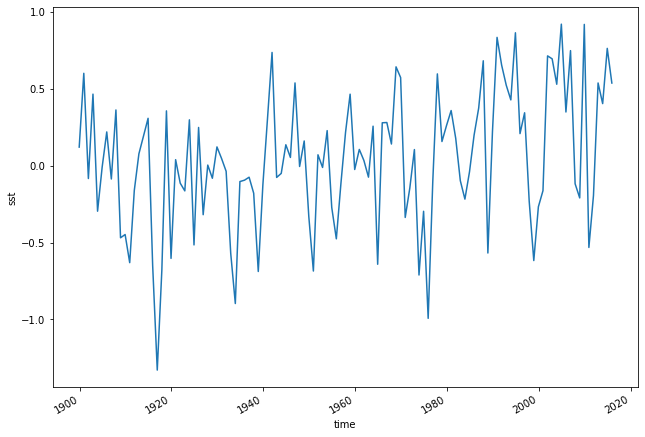

In [31]:
nwp_DJF.resample(time='AS-DEC').mean().plot(size=7)

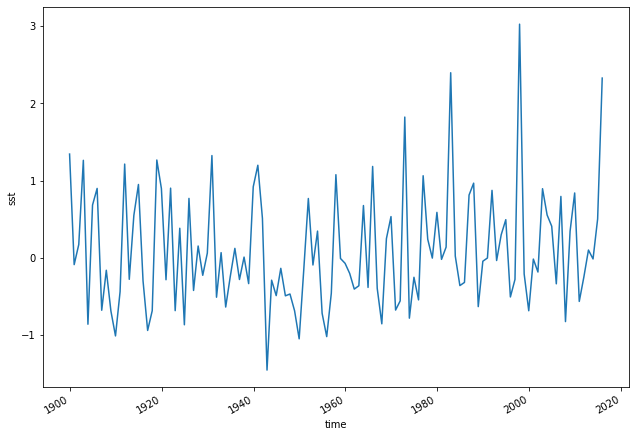

In [32]:
nct_DJF.resample(time='AS-DEC').mean().plot(size=7)

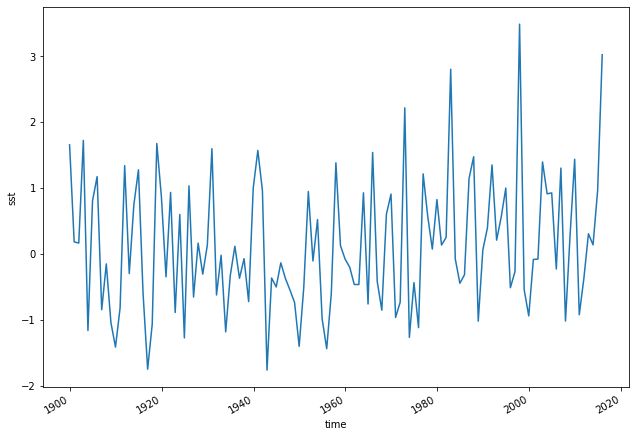

In [33]:
nino3_DJF.resample(time='AS-DEC').mean().plot(size=7)

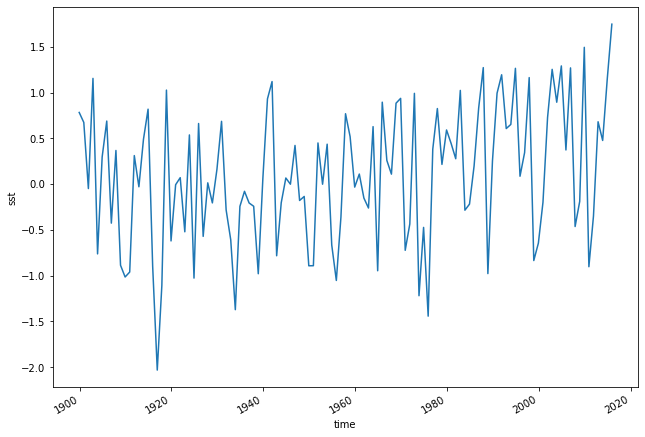

In [34]:
nino4_DJF.resample(time='AS-DEC').mean().plot(size=7)

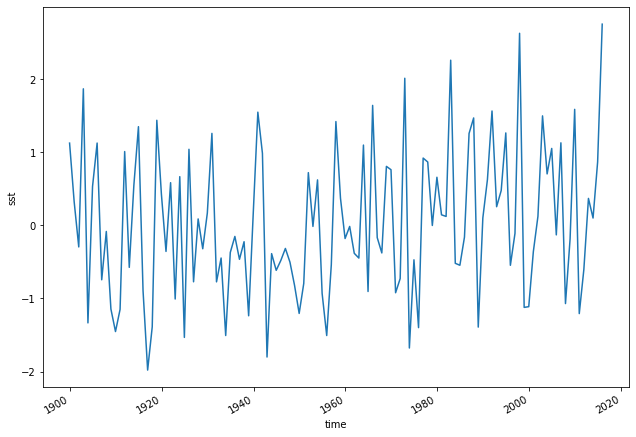

In [35]:
nino34_DJF.resample(time='AS-DEC').mean().plot(size=7)

In [36]:
nino34_DJF.resample(time='AS-DEC').mean()

<xarray.DataArray 'sst' (time: 117)>
array([ 1.12651610e+00,  3.23069483e-01, -2.94438273e-01,  1.86975896e+00,
       -1.33412707e+00,  5.33201933e-01,  1.12735116e+00, -7.44159698e-01,
       -8.26658532e-02, -1.14420223e+00, -1.45258343e+00, -1.14889944e+00,
        1.01088893e+00, -5.74082553e-01,  5.48520744e-01,  1.35146606e+00,
       -8.92742217e-01, -1.98012543e+00, -1.38874018e+00,  1.43896544e+00,
        4.27135468e-01, -3.55838805e-01,  5.84956110e-01, -1.00729382e+00,
        6.67334616e-01, -1.53277218e+00,  1.04181004e+00, -7.71622241e-01,
        8.86874869e-02, -3.19535375e-01,  1.69248268e-01,  1.25954521e+00,
       -7.72438288e-01, -4.46255922e-01, -1.50689459e+00, -3.70119452e-01,
       -1.50760666e-01, -4.63783741e-01, -2.23085925e-01, -1.23675287e+00,
        1.64505899e-01,  1.55001628e+00,  9.86635029e-01, -1.80136597e+00,
       -3.86022657e-01, -6.14627421e-01, -4.80449826e-01, -3.15300196e-01,
       -5.03766358e-01, -8.22925329e-01, -1.20464456e+00, -7.94380128e-01,
        7.22320080e-01, -1.37383565e-02,  6.23088717e-01, -9.30862129e-01,
       -1.50701714e+00, -5.37067473e-01,  1.42154539e+00,  3.71693522e-01,
       -1.79422989e-01, -1.39379678e-02, -3.81874472e-01, -4.46755886e-01,
        1.09971011e+00, -9.04349267e-01,  1.64267504e+00, -1.66669592e-01,
       -3.76641750e-01,  8.08061659e-01,  7.62270510e-01, -9.21326816e-01,
       -7.27619350e-01,  2.01420474e+00, -1.67786121e+00, -4.70698088e-01,
       -1.39890540e+00,  9.21571732e-01,  8.68009269e-01, -6.63061917e-04,
        6.59209430e-01,  1.45110950e-01,  1.22952782e-01,  2.26126575e+00,
       -5.18658221e-01, -5.45290232e-01, -1.59807131e-01,  1.25870097e+00,
        1.47086847e+00, -1.39165962e+00,  1.02059267e-01,  6.26672983e-01,
        1.56597137e+00,  2.55817562e-01,  4.77561384e-01,  1.26577914e+00,
       -5.45760870e-01, -1.08960994e-01,  2.62958884e+00, -1.12180412e+00,
       -1.11202037e+00, -3.58129859e-01,  1.24985479e-01,  1.49927485e+00,
        7.05038130e-01,  1.05360663e+00, -1.29553691e-01,  1.13032854e+00,
       -1.06969452e+00, -1.85424134e-01,  1.58853948e+00, -1.20689249e+00,
       -6.03161752e-01,  3.69642824e-01,  1.01097703e-01,  8.69218647e-01,
        2.75447130e+00], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1899-12-01 1900-12-01 ... 2015-12-01

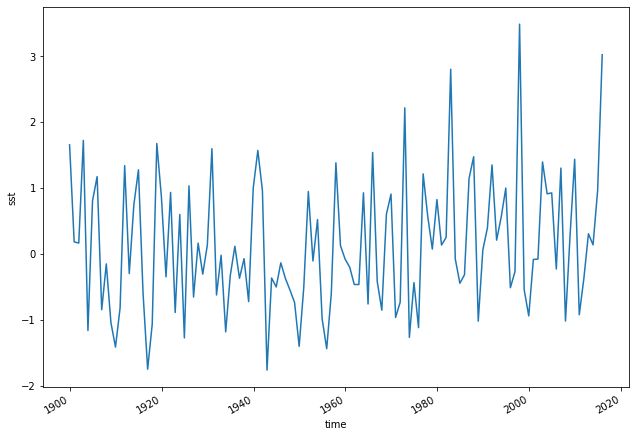

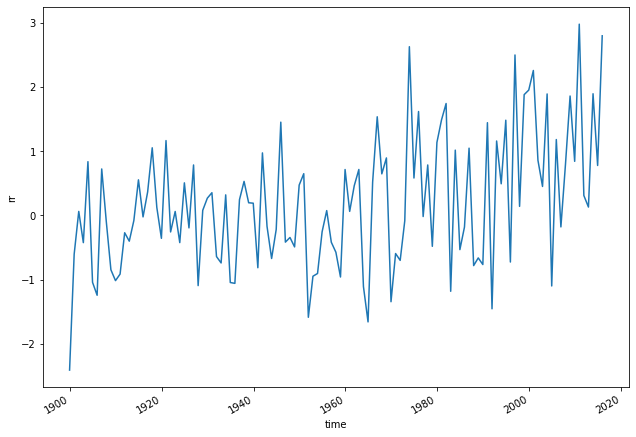

In [37]:
nino3_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot(size=7)

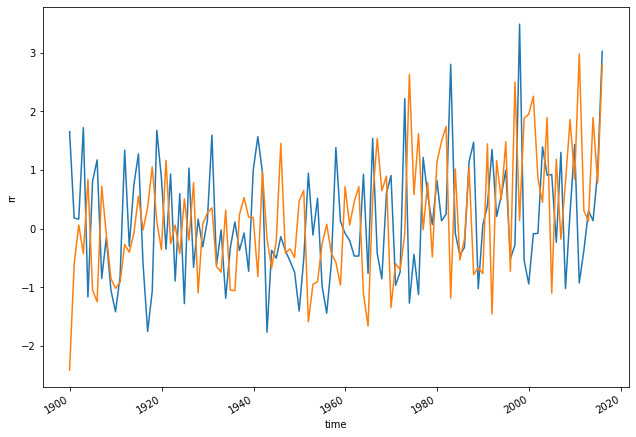

In [38]:
nino3_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot()

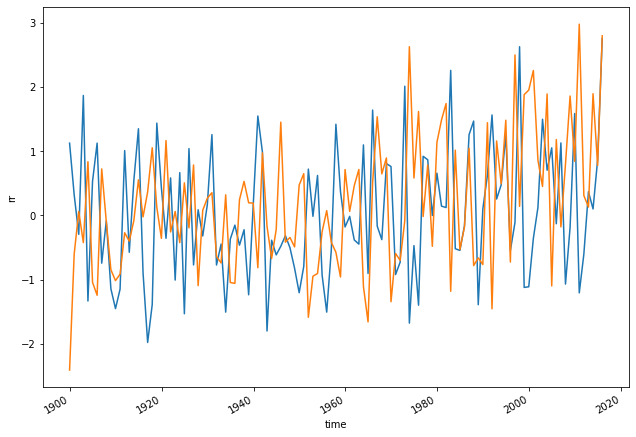

In [39]:
nino34_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot()

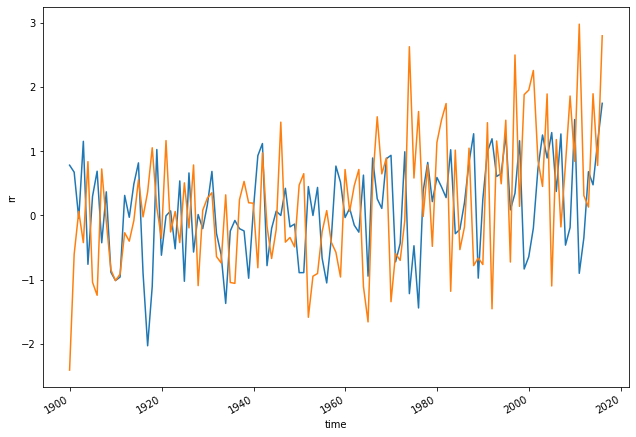

In [40]:
nino4_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot()

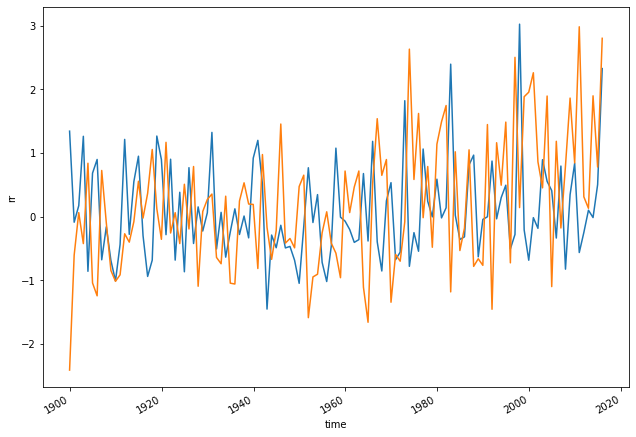

In [41]:
nct_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot()

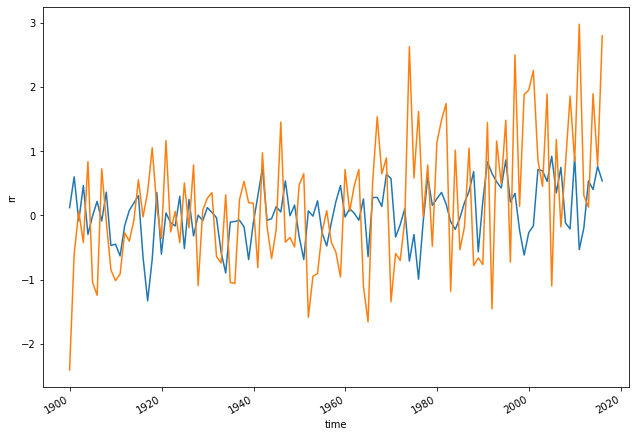

In [42]:
nwp_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot()

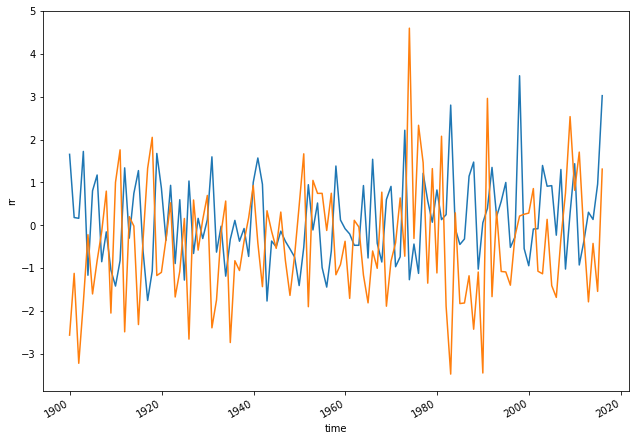

In [43]:
nino3_DJF.resample(time='AS-DEC').mean().plot(size=7)
ne_DJF.resample(time='AS-DEC').mean().plot()

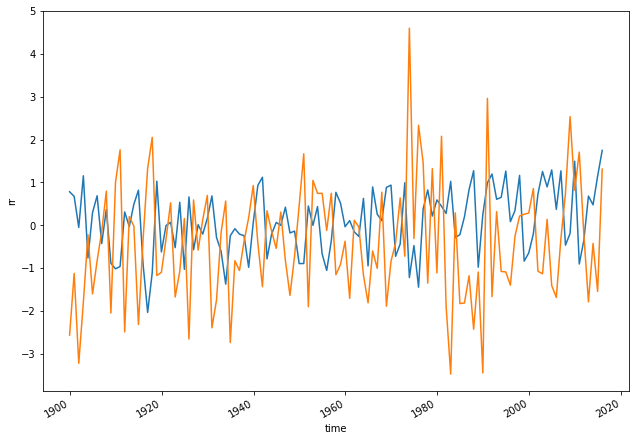

In [44]:
nino4_DJF.resample(time='AS-DEC').mean().plot(size=7)
ne_DJF.resample(time='AS-DEC').mean().plot()

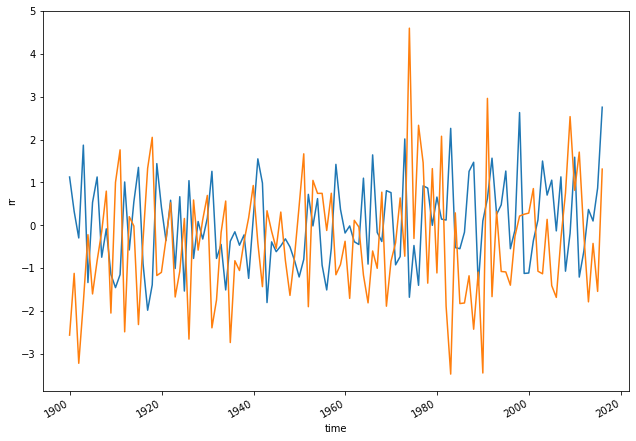

In [45]:
nino34_DJF.resample(time='AS-DEC').mean().plot(size=7)
ne_DJF.resample(time='AS-DEC').mean().plot()

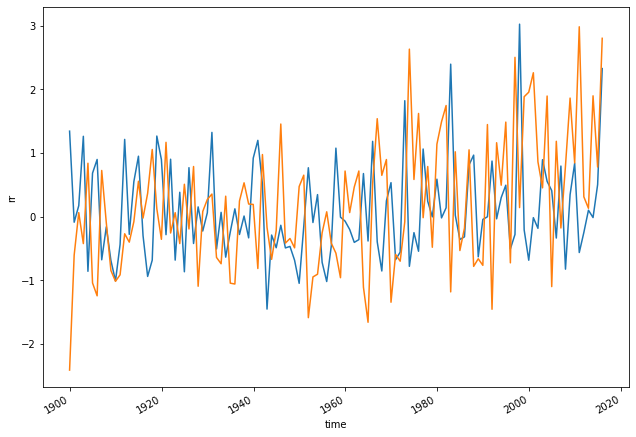

In [46]:
nct_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot()

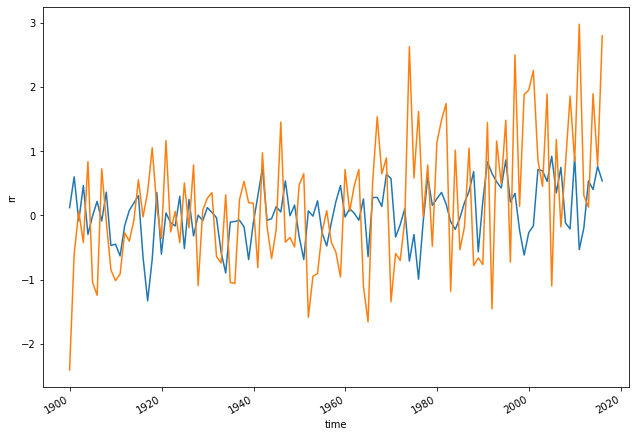

In [47]:
nwp_DJF.resample(time='AS-DEC').mean().plot(size=7)
nw_DJF.resample(time='AS-DEC').mean().plot()

In [48]:
nct_summer=nct_DJF.resample(time='AS-DEC').mean()
nwp_summer=nwp_DJF.resample(time='AS-DEC').mean()
nino3_summer=nino3_DJF.resample(time='AS-DEC').mean()
nino4_summer=nino4_DJF.resample(time='AS-DEC').mean()
nino34_summer=nino34_DJF.resample(time='AS-DEC').mean()
nw_summer=nw_DJF.resample(time='AS-DEC').mean()
ne_summer=ne_DJF.resample(time='AS-DEC').mean()

In [49]:
import pandas as pd

In [50]:
snino3=pd.Series(nino3_summer)
snino34=pd.Series(nino34_summer)
snino4=pd.Series(nino4_summer)
snct=pd.Series(nct_summer)
snwp=pd.Series(nwp_summer)
snw=pd.Series(nw_summer)
sne=pd.Series(ne_summer)

In [51]:
snino3.corr(snw,method='pearson')

-0.11960718485228815

In [52]:
snino4.corr(snw,method='pearson')

-0.057552208925058246

In [53]:
snino3.corr(snw,method='pearson')
snino34.corr(snw,method='pearson')
snino4.corr(snw,method='pearson')
snct.corr(snw,method='pearson')
snwp.corr(snw,method='pearson')
snino3.corr(sne,method='pearson')
snino34.corr(sne,method='pearson')
snino4.corr(sne,method='pearson')
snct.corr(sne,method='pearson')
snwp.corr(sne,method='pearson')

-0.3462658605711251

In [54]:
snino3.corr(snw,method='pearson')

-0.11960718485228815

In [55]:
snino34.corr(snw,method='pearson')

-0.12515381980404355

In [56]:
snino4.corr(snw,method='pearson')

-0.057552208925058246

In [57]:
snct.corr(snw,method='pearson')

-0.12762207423934135

In [58]:
snwp.corr(snw,method='pearson')

-0.004628686698554271

In [59]:
snino3.corr(sne,method='pearson')

-0.3396507676528702

In [60]:
snino34.corr(sne,method='pearson')

-0.3758570479635482

In [61]:
snino4.corr(sne,method='pearson')

-0.3884194025510436

In [62]:
snct.corr(sne,method='pearson')

-0.30057255360330537

In [63]:
snwp.corr(sne,method='pearson')

-0.3462658605711251

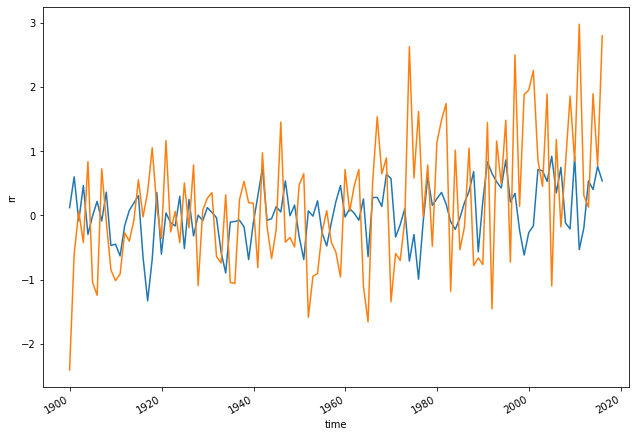

In [64]:
nwp_summer.plot(size=7)
nw_summer.plot()

In [65]:
nw_SON=nw_anomaly.groupby('time.season')['SON']
ne_SON=ne_anomaly.groupby('time.season')['SON']

In [66]:
nw_SON

<xarray.DataArray 'rr' (time: 348)>
array([ 1.60350045e-03, -3.47828388e-01, -1.68588012e-01, -5.21510914e-02,
       -4.10452127e-01, -1.30672410e-01, -1.09619983e-01, -2.90860087e-01,
        1.33371010e-01,  1.56254340e-02, -2.03415915e-01, -9.66342986e-02,
        1.77822709e-01,  1.99584112e-01, -4.50993061e-01, -8.41453895e-02,
       -1.94983572e-01, -4.71753657e-01,  4.23252165e-01,  2.11011112e-01,
        9.27761272e-02, -9.82490629e-02, -1.68787435e-01, -2.46718198e-01,
       -1.32239491e-01, -3.22314560e-01, -2.02638701e-01, -7.37582147e-02,
        9.52316970e-02,  1.04779339e+00, -3.36742327e-02,  7.95020629e-03,
        1.34687746e+00,  2.98039559e-02, -2.50067879e-02,  6.74901232e-02,
       -9.30766165e-02, -2.84533560e-01, -2.47122854e-01, -1.01306856e-01,
       -3.34246874e-01, -6.00546122e-01, -1.27532467e-01, -9.57123563e-02,
        7.18042433e-01, -5.45300879e-02, -2.11885110e-01, -3.72055143e-01,
       -5.21797426e-02,  1.14854169e+00,  4.77174699e-01,  2.42572680e-01,
        5.33623993e-02,  5.68826079e-01, -1.25237510e-01, -3.49678963e-01,
       -4.53032970e-01, -9.28522423e-02, -3.52366298e-01,  2.25002994e-03,
        3.99693370e-01,  1.80363096e-02,  1.39497852e+00, -4.43080738e-02,
       -5.65663874e-02, -1.23569317e-01, -6.94819167e-02,  2.71343619e-01,
       -2.01629341e-01, -1.37262121e-01, -6.87421560e-02, -5.32938063e-01,
       -7.64031410e-02, -6.09164312e-02,  2.30570912e-01, -1.24714255e-01,
       -4.10067528e-01, -3.54302436e-01, -4.83175106e-02, -4.17511344e-01,
...
       -2.38346294e-01, -9.24951211e-02, -3.99170309e-01,  2.58451998e-01,
        1.13824442e-01, -3.49376015e-02, -3.97896081e-01,  7.02085271e-02,
       -1.87430501e-01, -1.45013118e-02, -1.29980683e-01, -3.72225314e-01,
       -1.01299487e-01, -5.38182333e-02, -1.38791338e-01,  1.02472045e-01,
       -1.22583829e-01,  9.77188349e-02, -3.80408019e-01,  4.00879867e-02,
        3.99644263e-02, -2.44495690e-01,  2.07483217e-01,  4.75133121e-01,
        9.87437487e-01, -1.13448404e-01,  6.59699500e-01,  8.14022005e-01,
       -1.27767026e-01,  7.56274760e-01,  4.77059513e-01, -5.26761152e-02,
        4.77371842e-01,  6.65200472e-01, -5.69151863e-02, -4.32361245e-01,
        1.66544676e-01, -4.27801982e-02, -3.50359827e-01,  1.86702102e-01,
       -6.36850819e-02, -2.95657516e-01, -2.35037625e-01, -3.25375679e-03,
        3.66623104e-01,  3.83593619e-01, -3.88439139e-03, -1.05070360e-01,
       -3.47927064e-01, -1.18072130e-01, -3.19349200e-01,  2.99564511e-01,
        9.59866270e-02, -2.21263915e-01,  9.28928971e-01, -7.30710253e-02,
       -3.64031017e-01, -3.18215191e-01,  8.12466979e-01,  1.41085064e+00,
        2.62037933e-01, -1.26090795e-01,  4.81349856e-01,  1.55657756e+00,
       -4.11075763e-02, -2.18696192e-01,  2.71157920e-01, -1.12708770e-01,
       -1.53445646e-01,  9.09610808e-01, -1.31695136e-01, -3.87690455e-01,
        2.02796131e-01, -1.24305464e-01, -2.43075117e-01,  8.67043957e-02],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1900-09-16 1900-10-16T12:00:00 ... 2015-11-16
    month    (time) int64 9 10 11 9 10 11 9 10 11 9 ... 9 10 11 9 10 11 9 10 11

In [67]:
nino3_SON=nino3_modern.groupby('time.season')['SON']
nino34_SON=nino34_modern.groupby('time.season')['SON']
nino4_SON=nino4_modern.groupby('time.season')['SON']
nct_SON=nct_modern.groupby('time.season')['SON']
nwp_SON=nwp_modern.groupby('time.season')['SON']

In [68]:
nwp_SON.resample(time='AS-SEP').mean()

<xarray.DataArray 'sst' (time: 116)>
array([ 5.19721031e-01, -7.72548714e-03, -2.89994164e-02, -1.34531868e-02,
       -1.40250135e-01,  2.63531884e-01,  2.85387357e-03,  1.61666435e-01,
       -5.41543789e-01, -3.54803569e-01, -7.26270613e-01, -2.08986566e-01,
        1.34284856e-01, -1.41739776e-01,  8.17103805e-02, -2.18894398e-01,
       -2.87080695e-01, -1.49380035e+00, -4.97001097e-02, -5.97796134e-01,
        2.38209055e-01, -2.65944351e-01, -1.09466172e-01,  1.00976824e-02,
       -2.34715840e-01, -1.49171219e-02,  1.51232913e-01, -1.26208902e-01,
       -8.09359342e-03,  2.32733990e-02,  3.07319756e-02,  6.61170309e-02,
       -2.79409020e-01, -6.47399278e-01, -3.39961639e-01, -2.43019107e-01,
        3.33436679e-02, -2.28653000e-01, -8.80726884e-01, -3.37366529e-01,
        4.16821307e-01,  7.21164317e-01,  2.92814673e-01, -6.82314361e-02,
        2.02588695e-01, -1.12415557e-01,  2.72747875e-01,  1.90846290e-01,
        1.90649405e-01, -2.27049545e-01, -5.48014872e-01,  1.76246126e-01,
        5.42032722e-02,  2.04567397e-01, -1.01052498e-01, -2.10496567e-01,
       -3.46850977e-01, -1.07361687e-01,  4.20738011e-01,  7.92282309e-02,
       -4.65194042e-02,  7.12301973e-02, -6.64459735e-02,  1.92653069e-01,
       -4.15285561e-01,  1.40546985e-01,  4.91028186e-01,  1.54019864e-01,
        2.61052879e-01,  4.67712859e-01,  5.00230565e-02, -3.69972431e-01,
        1.13075304e-02, -2.55110423e-01, -3.78775223e-01, -8.41016874e-01,
       -2.28126657e-01,  4.63524152e-01,  9.37523287e-02,  8.39305462e-02,
        3.96664200e-01,  3.56105644e-02,  2.27572960e-01, -2.27618554e-01,
        1.09645767e-03,  5.16374530e-02,  3.98835655e-01,  4.86507274e-01,
        2.79376604e-02, -1.08948107e-01,  5.29311723e-01,  6.17234949e-01,
        5.33146604e-01,  3.70633233e-01,  9.21118223e-01,  4.57515703e-01,
        2.10900798e-01, -4.05652308e-02, -3.21095910e-01, -2.63121008e-01,
       -1.10974665e-01,  5.66681283e-01,  7.63136161e-01,  5.51713301e-01,
        8.23996529e-01,  4.14855246e-01,  6.21394899e-01,  2.36164184e-01,
       -2.15980403e-01,  5.78142107e-01, -2.23784441e-01, -3.20693807e-02,
        2.51654231e-01,  3.98219420e-01,  5.70486499e-01,  5.40058099e-01])
Coordinates:
  * time     (time) datetime64[ns] 1900-09-01 1901-09-01 ... 2015-09-01

In [69]:
nct_spring=nct_SON.resample(time='AS-SEP').mean()
nwp_spring=nwp_SON.resample(time='AS-SEP').mean()
nino3_spring=nino3_SON.resample(time='AS-SEP').mean()
nino4_spring=nino4_SON.resample(time='AS-SEP').mean()
nino34_spring=nino34_SON.resample(time='AS-SEP').mean()
nw_spring=nw_SON.resample(time='AS-SEP').mean()
ne_spring=ne_SON.resample(time='AS-SEP').mean()

In [70]:
snino3_spring=pd.Series(nino3_spring)
snino34_spring=pd.Series(nino34_spring)
snino4_spring=pd.Series(nino4_spring)
snct_spring=pd.Series(nct_spring)
snwp_spring=pd.Series(nwp_spring)
snw_spring=pd.Series(nw_spring)
sne_spring=pd.Series(ne_spring)

In [71]:
snino3_spring.corr(snw_spring,method='pearson')

-0.3332436302514763

In [72]:
snino34_spring.corr(snw_spring,method='pearson')

-0.3912186654099816

In [73]:
snino4_spring.corr(snw_spring,method='pearson')

-0.4040518105604168

In [74]:
snct_spring.corr(snw_spring,method='pearson')

-0.2789575407589625

In [75]:
snwp_spring.corr(snw_spring,method='pearson')

-0.3476081024884193

In [76]:
snino3_spring.corr(sne_spring,method='pearson')

-0.5431120846823031

In [77]:
snino34_spring.corr(sne_spring,method='pearson')

-0.6147721384071166

In [78]:
snino4_spring.corr(sne_spring,method='pearson')

-0.6595591084416397

In [79]:
snct_spring.corr(sne_spring,method='pearson')

-0.4644980436585217

In [80]:
snwp_spring.corr(sne_spring,method='pearson')

-0.5726865234589908

AttributeError: 'Line2D' object has no property 'size'

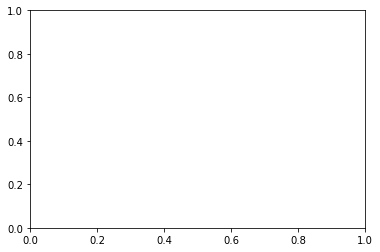

In [81]:
snino3_spring.plot(size=7)
snw_spring.plot()

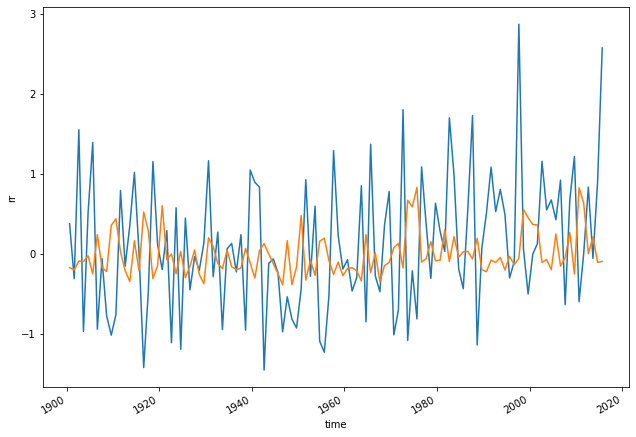

In [82]:
nino3_spring.plot(size=7)
nw_spring.plot()

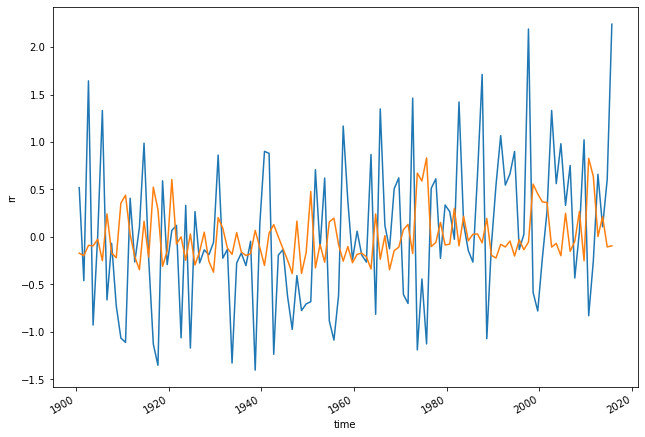

In [83]:
nino34_spring.plot(size=7)
nw_spring.plot()

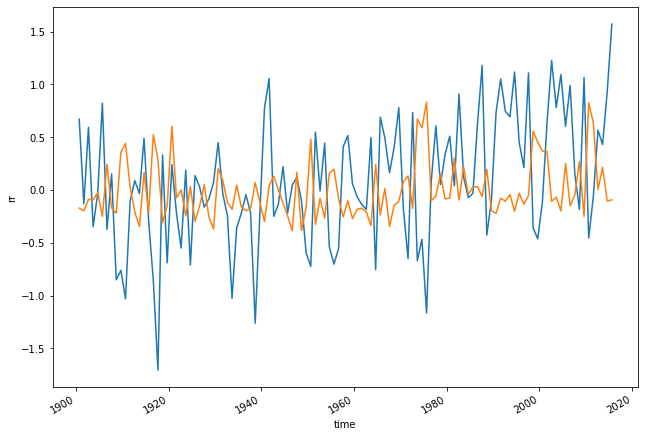

In [84]:
nino4_spring.plot(size=7)
nw_spring.plot()

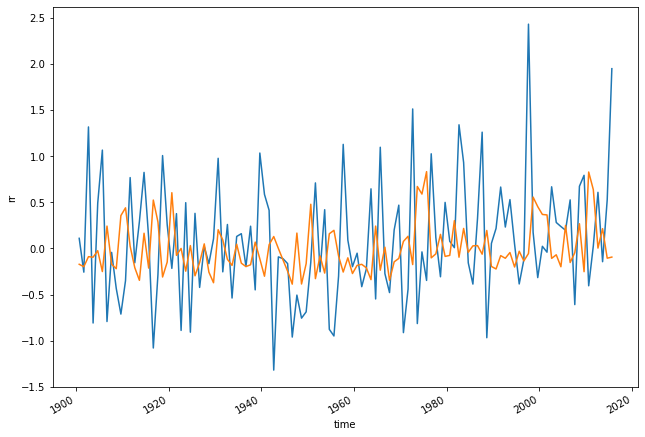

In [85]:
nct_spring.plot(size=7)
nw_spring.plot()

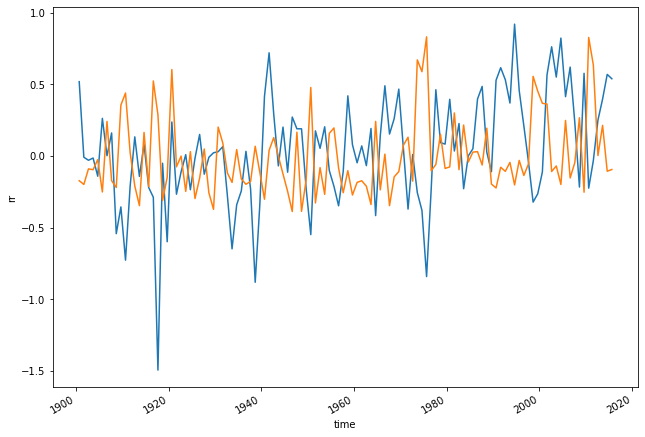

In [86]:
nwp_spring.plot(size=7)
nw_spring.plot()

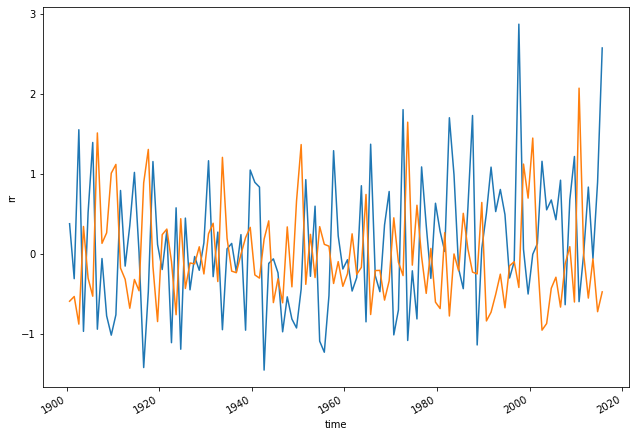

In [87]:
nino3_spring.plot(size=7)
ne_spring.plot()

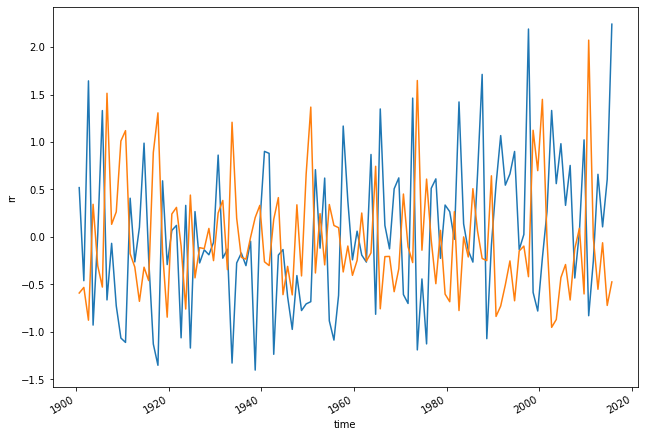

In [88]:
nino34_spring.plot(size=7)
ne_spring.plot()

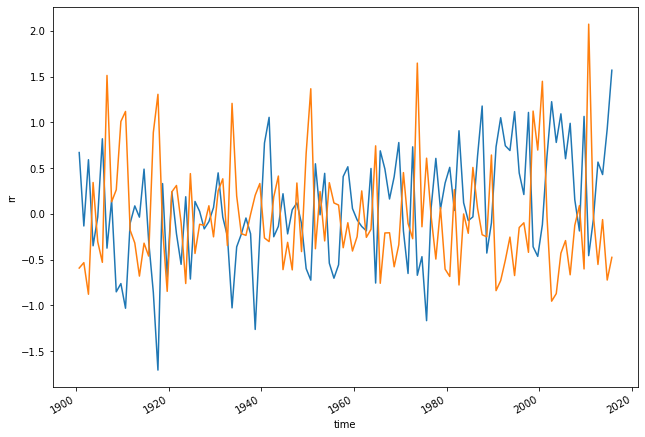

In [89]:
nino4_spring.plot(size=7)
ne_spring.plot()

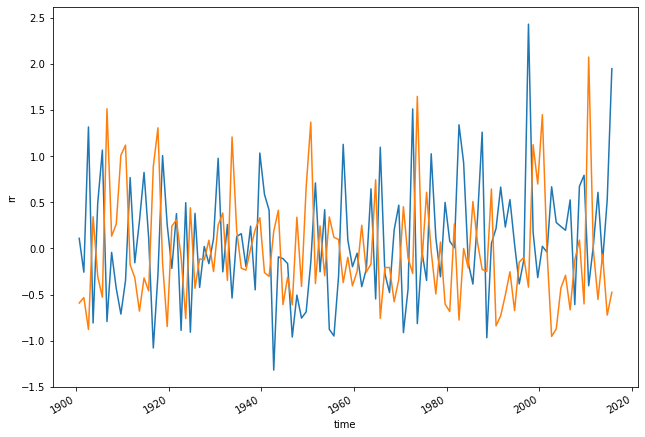

In [90]:
nct_spring.plot(size=7)
ne_spring.plot()

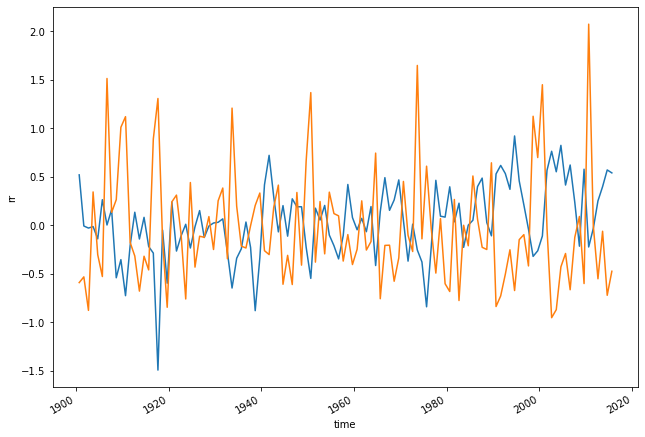

In [91]:
nwp_spring.plot(size=7)
ne_spring.plot()

In [92]:
nw_MAM=nw_anomaly.groupby('time.season')['MAM']
ne_MAM=ne_anomaly.groupby('time.season')['MAM']
nino3_MAM=nino3_modern.groupby('time.season')['MAM']
nino34_MAM=nino34_modern.groupby('time.season')['MAM']
nino4_MAM=nino4_modern.groupby('time.season')['MAM']
nct_MAM=nct_modern.groupby('time.season')['MAM']
nwp_MAM=nwp_modern.groupby('time.season')['MAM']
nct_autumn=nct_MAM.resample(time='AS-MAR').mean()
nwp_autumn=nwp_MAM.resample(time='AS-MAR').mean()
nino3_autumn=nino3_MAM.resample(time='AS-MAR').mean()
nino4_autumn=nino4_MAM.resample(time='AS-MAR').mean()
nino34_autumn=nino34_MAM.resample(time='AS-MAR').mean()
nw_autumn=nw_MAM.resample(time='AS-MAR').mean()
ne_autumn=ne_MAM.resample(time='AS-MAR').mean()
snino3_autumn=pd.Series(nino3_autumn)
snino34_autumn=pd.Series(nino34_autumn)
snino4_autumn=pd.Series(nino4_autumn)
snct_autumn=pd.Series(nct_autumn)
snwp_autumn=pd.Series(nwp_autumn)
snw_autumn=pd.Series(nw_autumn)
sne_autumn=pd.Series(ne_autumn)

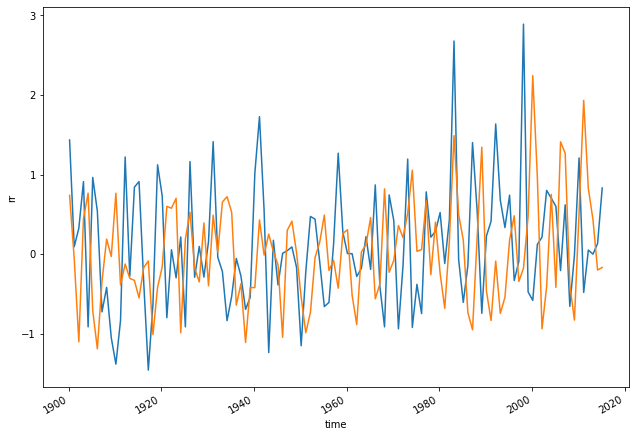

In [93]:
nino3_autumn.plot(size=7)
nw_autumn.plot()

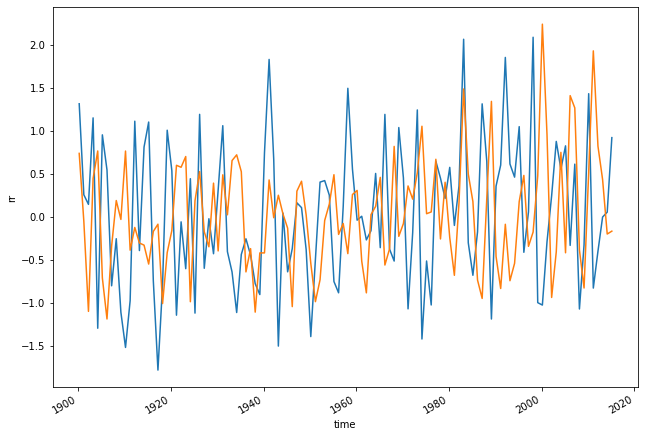

In [94]:
nino34_autumn.plot(size=7)
nw_autumn.plot()

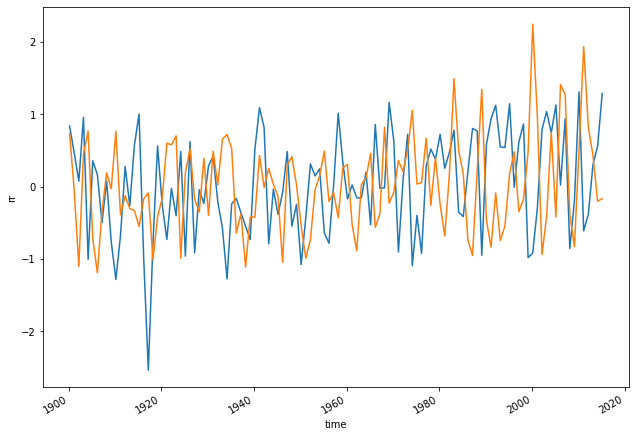

In [95]:
nino4_autumn.plot(size=7)
nw_autumn.plot()

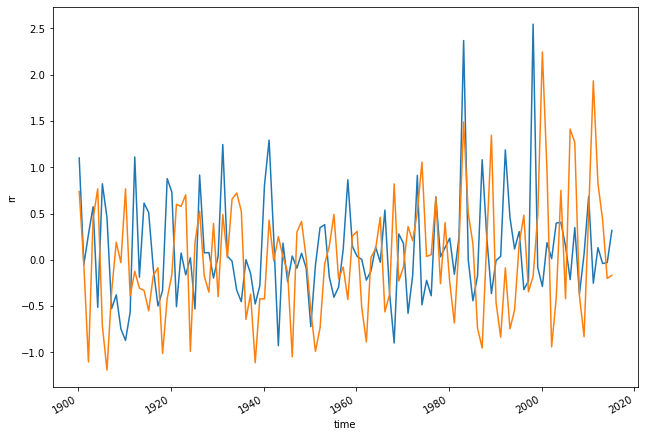

In [96]:
nct_autumn.plot(size=7)
nw_autumn.plot()

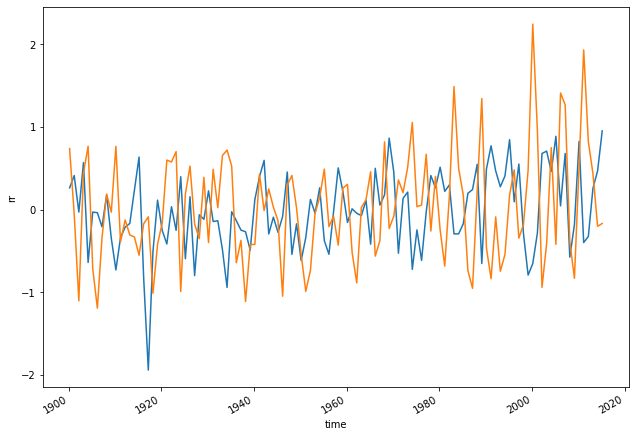

In [97]:
nwp_autumn.plot(size=7)
nw_autumn.plot()

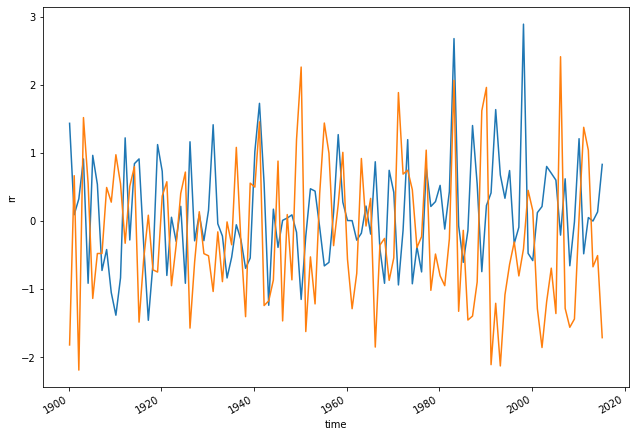

In [98]:
nino3_autumn.plot(size=7)
ne_autumn.plot()

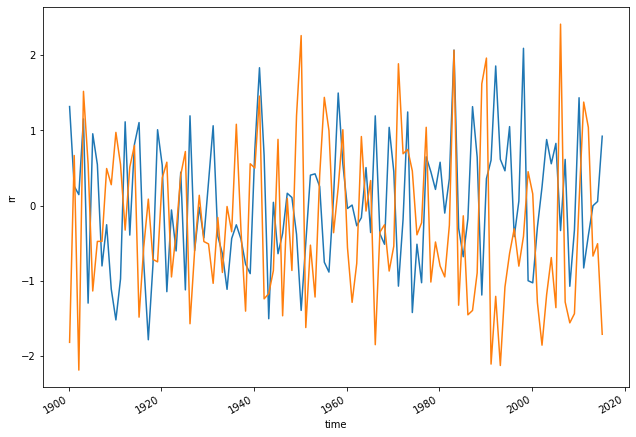

In [99]:
nino34_autumn.plot(size=7)
ne_autumn.plot()

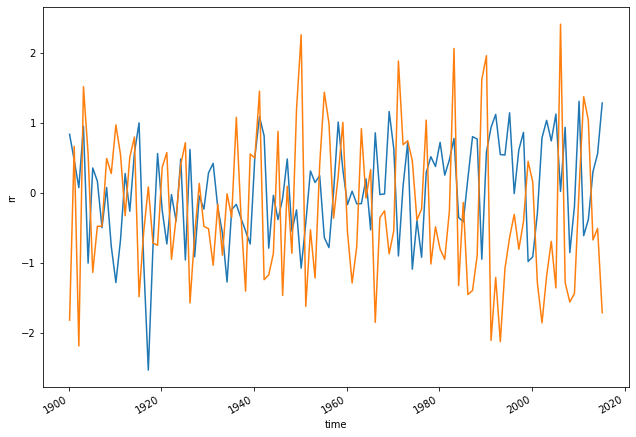

In [100]:
nino4_autumn.plot(size=7)
ne_autumn.plot()

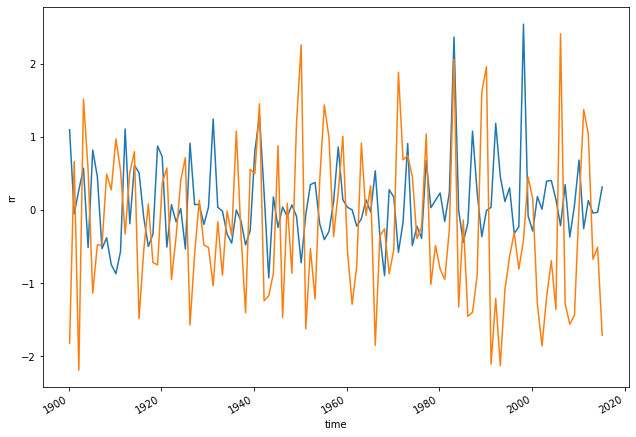

In [101]:
nct_autumn.plot(size=7)
ne_autumn.plot()

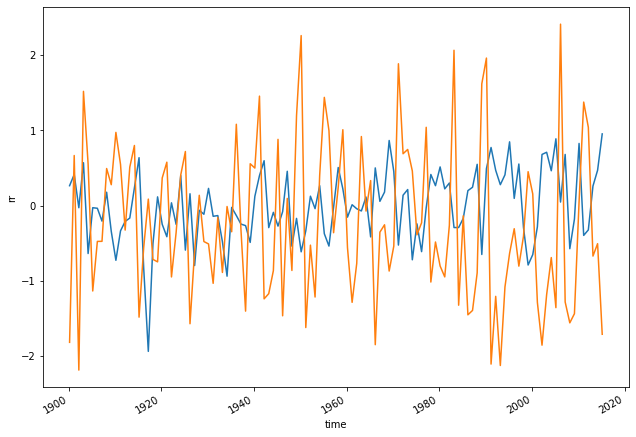

In [102]:
nwp_autumn.plot(size=7)
ne_autumn.plot()

In [103]:
snino3_autumn.corr(snw_autumn,method='pearson')

-0.08622023992132517

In [104]:
snino34_autumn.corr(snw_autumn,method='pearson')

-0.14963640524526686

In [105]:
snino4_autumn.corr(snw_autumn,method='pearson')

-0.18770933070926443

In [106]:
snct_autumn.corr(snw_autumn,method='pearson')

-0.03268103974925265

In [107]:
snwp_autumn.corr(snw_autumn,method='pearson')

-0.22068761103523765

In [108]:
snino3_autumn.corr(sne_autumn,method='pearson')

-0.21450940246928327

In [109]:
snino34_autumn.corr(sne_autumn,method='pearson')

-0.24325044705489976

In [110]:
snino4_autumn.corr(sne_autumn,method='pearson')

-0.304658785332485

In [111]:
snct_autumn.corr(sne_autumn,method='pearson')

-0.1452372483576006

In [112]:
snwp_autumn.corr(sne_autumn,method='pearson')

-0.3122029967050638

In [113]:
snwp_autumn.corr(sne_autumn,method='pearson')

-0.3122029967050638